# Домашнее задание (28 баллов)

In [159]:
import random
import powerlaw
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

## 1. Теория (6 баллов)

 Сеть $G(t)$ образуется присоединением к центральному узлу $t$ треугольников - см. рисунок. ![picture](https://drive.google.com/uc?export=view&id=10oUgXsay2rBYHGIbKoHJVvj95Rl632qz)

 Пусть всего в сети $n$ вершин, $n=2t+1$.

*  (2 балла) Определите средний коэффициент кластеризации вершин в сети $\overline{C}$  как функцию $n$. Чему равен предел при $n \to \infty$?
* (2 балла) Определите транзитивность  $T$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$?
* (2 балла) Определите коэффициент ассортативности  $r$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$?

**Вопрос 1**
$$
\text{Посчитаем средний коэффициент кластеризации как:}
$$

$$
\overline{C} = \frac{C_c + \sum\limits_{i \neq c} C_i}{n},
$$

$$
\text{где } C_c \text{ - коэффициент кластеризации центральной вершины, а } C_i \text{ - коэффициент кластеризации для каждой не центральной вершины } i.
$$

$$
\text{Для центральной вершины } C_c = \frac{2 \cdot N_t}{k_c \cdot (k_c - 1)} = \frac{2 \cdot t}{(n-1) \cdot (n-2)} = \frac{n - 1}{(n-1) \cdot (n-2)} = \frac{1}{n-2} \text{, где } n = 2t + 1.
$$

$$
\text{Для остальных вершин } C_i = \frac{2 \cdot 1}{2 \cdot (2 - 1)} = 1 \text{ (все соседи соединены между собой).}
$$

$$
\text{Следовательно, }
\overline{C} = \frac{\frac{1}{n-2} + (n-1)}{n}
$$

$$
\lim\limits_{n \rightarrow \infty} \frac{\frac{1}{n-2} + (n-1)}{n} = 1
$$

$$
\text{Таким образом, при } n \to \infty \text{ средний коэффициент кластеризации } \overline{C} \text{ стремится к } 1.
$$


**Вопрос 2**

$$
T(n) = \frac{6 N_t}{\sum\limits_i k_i (k_i - 1)} = \frac{6t}{(n - 1)(n-2) + 2(n-1)} = \frac{3(n-1)}{(n-1)n} = \frac{3}{n}
$$

Таким образом, коэффициент транзитивности $T(n)$ остается постоянным и равным $\frac{3}{n}$ при увеличении числа вершин $n$.

Следовательно, $\lim\limits_{n \rightarrow \infty}T(n) = \lim\limits_{n \rightarrow \infty} \frac{3}{n} = 0$.


**Вопрос 3**

$$
E_x = E_y = \frac{n+3}{3}, \quad E(x;y) = \frac{4n}{3}
$$

$$
\sigma_X \cdot \sigma_y = E_x^2 - (E_x)^2 = \frac{8+(n-1)^2}{2} - \left(\frac{n+3}{3}\right)^2
$$

$$
r = \frac{E_{xy} - E_xE_y}{\sigma_y \cdot \sigma_x}, \lim_{n \to \infty} r = -\frac{1}{2}
$$


## 2. Анализ данных (22 балла)
Выберите данные [здесь](https://networkrepository.com/networks.php) или [здесь](https://snap.stanford.edu/data/).
Выведите число вершин, число ребер и плотность сети.




In [70]:
G = nx.read_edgelist("bn-mouse_retina_1.edges")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Density:", nx.density(G))

Nodes: 1076
Edges: 90811
Density: 0.15701737702083512


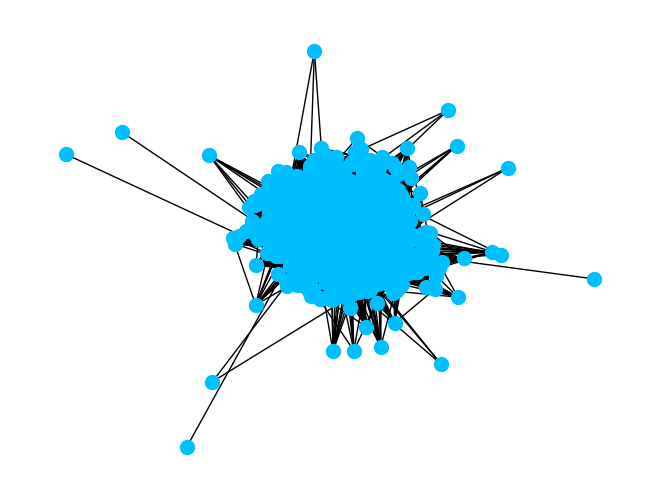

In [3]:
pos = nx.spring_layout(G, iterations=10)
nx.draw(G, pos, node_size=100, with_labels=False, node_color="deepskyblue")
limits = plt.axis("off")

### Основные структурные свойства ( 5 баллов)

*  (2 балла)  Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?

*  (1 балл) Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин;

*  (2 балла) Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности;



Mean: 0.5906286899089398
Median: 0.6454688880474568


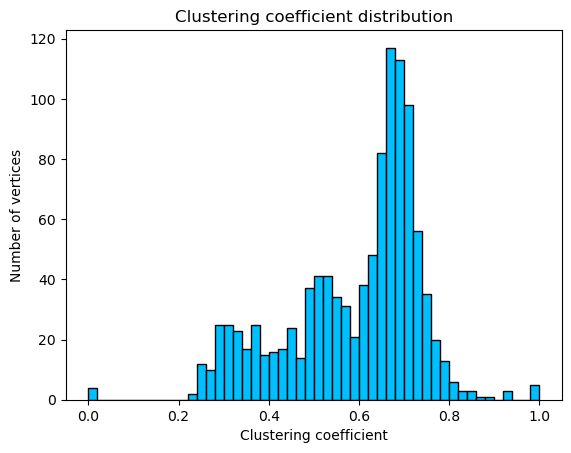

In [4]:
clust = nx.clustering(G)
clust_val = clust.values()
plt.title("Clustering coefficient distribution")
plt.xlabel("Clustering coefficient")
plt.ylabel("Number of vertices")
plt.hist(clust_val, bins=50, color="deepskyblue", edgecolor="black")
print("Mean:", np.mean(list(clust_val)))
print("Median:", np.median(list(clust_val)))

In [5]:
zero_clust = list(clust_val).count(0)
one_clust = list(clust_val).count(1)
print("Number of vertices with zero clustering coefficient:", zero_clust)
print("Number of vertices with unit clustering coefficient:", one_clust)

Number of vertices with zero clustering coefficient: 4
Number of vertices with unit clustering coefficient: 5


Большниство вершин имеет высокий коэффициент кластеризации (≈0.7), что может говорить о ярко выраженной структуре сообществ в сети

In [6]:
degrees = dict(G.degree())
degree_val = list(degrees.values())
corr_coeff = np.corrcoef(degree_val, list(clust_val))[0, 1]
print("Pearson correlation coefficient: ", corr_coeff)

Pearson correlation coefficient:  -0.8566747391827054


Number of connectivity components: 1


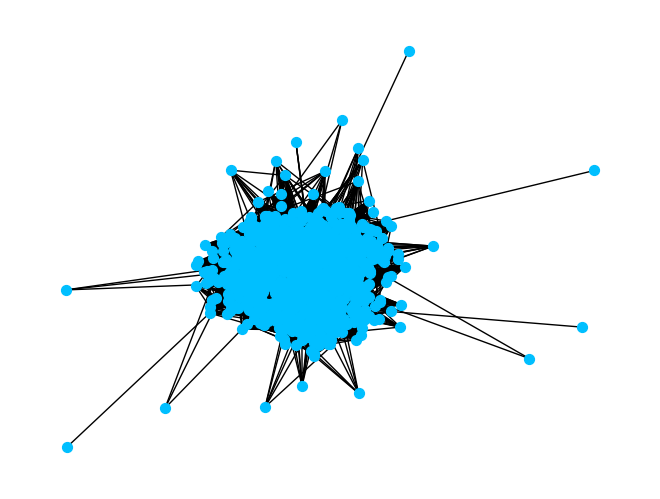

In [7]:
print("Number of connectivity components:", nx.number_connected_components(G))
pos = nx.spring_layout(G, iterations=10)
nx.draw(G, pos, node_size=50, with_labels=False, node_color="deepskyblue")
limits = plt.axis("off")

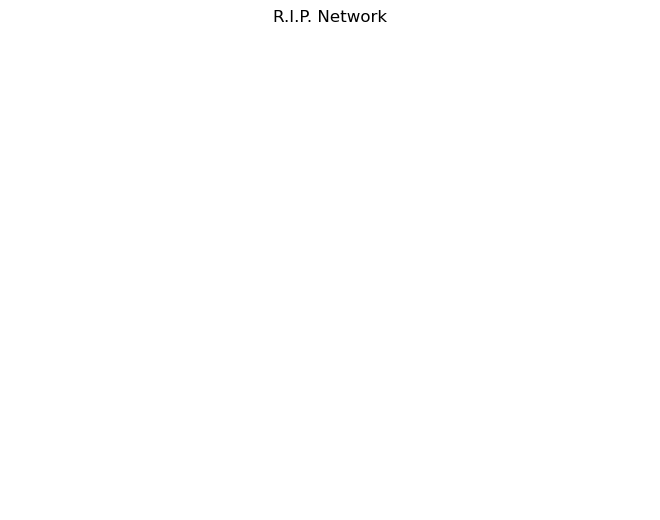

In [8]:
G1 = G.copy()
max_component = max(nx.connected_components(G1), key=len)
G1.remove_nodes_from(max_component)
pos=nx.spring_layout(G1,iterations=10)
nx.draw(G1,pos,node_size=50,with_labels=False, node_color="deepskyblue")
plt.title("R.I.P. Network")
limits = plt.axis("off")

Т. к. сеть имела всего одну компоненту связности (каждая вершина достижима из любой другой вершины), она была полностью удалена. В данном случае, распределение размера компонент связности построить невозможно.


### Распределение степеней и корреляция ( 10 баллов)

*  (3 балла) Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения.

*  (1 балл) Определите коэффициент ассортативности сети.

*  (2 балла) Постройте функцию корреляции степеней. Для этого для каждого значения степени $k$ определите  среднее значение средней степени ближайших соседей вершин :).

* (2 балл) Постройте зависимость коэффициента Rich Club от k.

* (2 балла) Напишите функцию разложения сети по k-core, постройте соответвующее разложение.

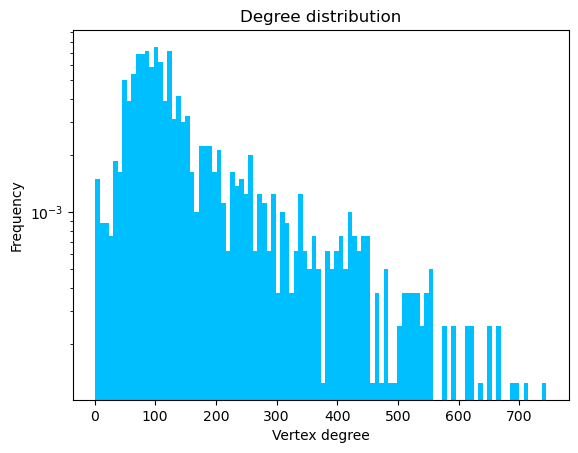

In [9]:
degrees = [d for n, d in G.degree()]
plt.hist(degrees, bins=100, density=True, log=True, color="deepskyblue")
plt.title("Degree distribution")
plt.xlabel("Vertex degree")
plt.ylabel("Frequency");

In [10]:
print("Avg degree:", np.mean(degrees))
print("Max degree:", np.max(degrees))
print("Min degree:", np.min(degrees))
print("Std:", np.std(degrees))

Avg degree: 168.79368029739777
Max degree: 744
Min degree: 1
Std: 132.47408457029601


In [11]:
results = powerlaw.Fit(degrees)
print(results.power_law.alpha)
print(results.power_law.xmin)

Calculating best minimal value for power law fit
2.322150792850075%
83.0


In [12]:
print("Assortativity:", nx.degree_assortativity_coefficient(G))

Assortativity: -0.1975667350969014


Связи в сети распределены случайным образом относительно степени связности вершин

In [58]:
def avg_neighbor_degree(G):
    deg = dict(G.degree())
    deg_avg_neighbor = defaultdict(list)
    
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        nb_degrees = [deg[neighbor] for neighbor in neighbors]
        avg_nb_deg = sum(nb_degrees) / len(nb_degrees) if nb_degrees else 0
        deg_avg_neighbor[deg[node]].append(avg_nb_deg)

    return {degree: sum(avg_nb_degrees) / len(avg_nb_degrees) for degree, avg_nb_degrees in deg_avg_neighbor.items()}


corr_avg_nb_deg = avg_neighbor_degree(G)
res = sorted(corr_avg_nb_deg.items(), key=lambda x: x[0])
for degree, avg_nb_deg in res:
    print(f"k: {degree}, Avg. k of NN: {avg_nb_deg}")

k: 1, Avg. k of NN: 259.5
k: 2, Avg. k of NN: 386.5
k: 3, Avg. k of NN: 207.08333333333334
k: 6, Avg. k of NN: 270.25
k: 7, Avg. k of NN: 290.42857142857144
k: 10, Avg. k of NN: 274.7
k: 11, Avg. k of NN: 175.27272727272728
k: 12, Avg. k of NN: 241.66666666666666
k: 13, Avg. k of NN: 265.38461538461536
k: 14, Avg. k of NN: 208.17857142857144
k: 15, Avg. k of NN: 276.53333333333336
k: 17, Avg. k of NN: 278.8235294117647
k: 18, Avg. k of NN: 228.72222222222223
k: 19, Avg. k of NN: 253.68421052631578
k: 21, Avg. k of NN: 260.0
k: 22, Avg. k of NN: 279.8636363636364
k: 24, Avg. k of NN: 319.625
k: 25, Avg. k of NN: 266.6
k: 26, Avg. k of NN: 268.5
k: 28, Avg. k of NN: 286.29761904761904
k: 31, Avg. k of NN: 315.03225806451616
k: 33, Avg. k of NN: 320.3030303030303
k: 34, Avg. k of NN: 300.47058823529414
k: 35, Avg. k of NN: 298.1714285714286
k: 36, Avg. k of NN: 298.8333333333333
k: 37, Avg. k of NN: 292.2972972972973
k: 38, Avg. k of NN: 307.7565789473684
k: 39, Avg. k of NN: 272.58974358

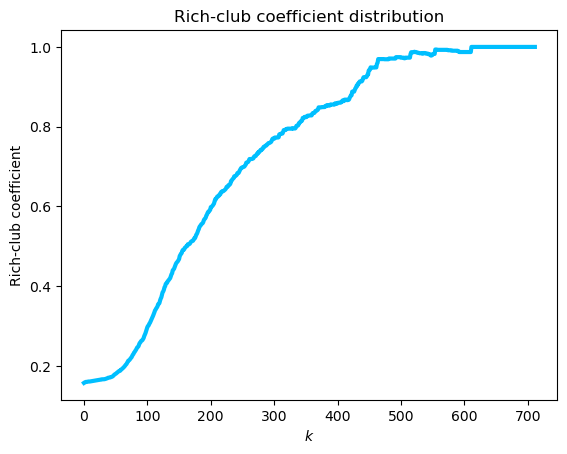

In [173]:
rich_club = nx.rich_club_coefficient(G, normalized=False)
k, rc = zip(*rich_club.items())
plt.plot(k, rc, color="deepskyblue", linewidth=3)
plt.title("Rich-club coefficient distribution")
plt.xlabel("$k$")
plt.ylabel("Rich-club coefficient");

In [37]:
kcore = []
k = 1
kG = nx.k_core(G, k)
while len(kG) != 0:
    kcore.append(len(kG))
    print(f"k-core {k}: {kcore[-1]}")
    k += 1
    kG = nx.k_core(G, k)

k-core 1: 1076
k-core 2: 1072
k-core 3: 1071
k-core 4: 1067
k-core 5: 1067
k-core 6: 1067
k-core 7: 1065
k-core 8: 1064
k-core 9: 1064
k-core 10: 1064
k-core 11: 1063
k-core 12: 1062
k-core 13: 1061
k-core 14: 1060
k-core 15: 1058
k-core 16: 1057
k-core 17: 1057
k-core 18: 1056
k-core 19: 1055
k-core 20: 1053
k-core 21: 1053
k-core 22: 1051
k-core 23: 1050
k-core 24: 1050
k-core 25: 1048
k-core 26: 1047
k-core 27: 1047
k-core 28: 1047
k-core 29: 1044
k-core 30: 1044
k-core 31: 1044
k-core 32: 1043
k-core 33: 1043
k-core 34: 1041
k-core 35: 1040
k-core 36: 1038
k-core 37: 1036
k-core 38: 1031
k-core 39: 1028
k-core 40: 1027
k-core 41: 1027
k-core 42: 1025
k-core 43: 1022
k-core 44: 1020
k-core 45: 1016
k-core 46: 1014
k-core 47: 1006
k-core 48: 997
k-core 49: 989
k-core 50: 986
k-core 51: 981
k-core 52: 978
k-core 53: 976
k-core 54: 971
k-core 55: 965
k-core 56: 961
k-core 57: 957
k-core 58: 954
k-core 59: 949
k-core 60: 943
k-core 61: 936
k-core 62: 923
k-core 63: 913
k-core 64: 908
k-

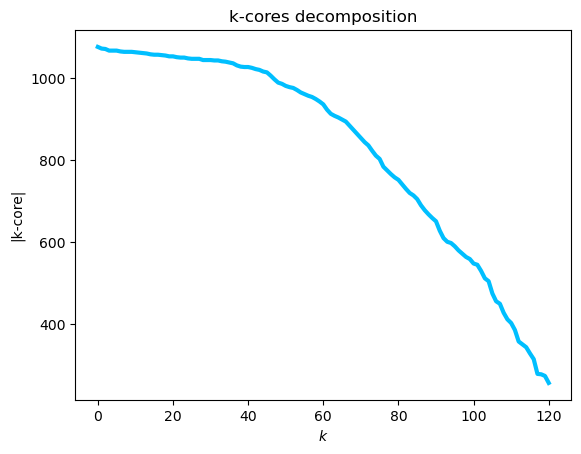

In [172]:
plt.plot(kcore, color="deepskyblue", linewidth=3)
plt.title("k-cores decomposition")
plt.xlabel("$k$")
plt.ylabel("|k-core|");

### Моделирование и рандомизация (7 баллов)


* (2 балла) Для выбранной сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта, чтобы совпадали числа вершин и ребер. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает кластеризацию сети.

* ( 2 балла) Постройте конфигурационную модель для выбранной сети, выведите число петель и мультиребер в модели. Удалите петли и мультиребра и сравните статистику степеней.
Лучше ли конфигурационная модель справляется с описанием кластеризации?

* (2 балла) Напишите функцию, осуществляющую заданное число шагов $Q$ рандомизации.
Лучше задавать множителем $f$ от числа ребер в системе, т.е. $f=\frac{Q}{L}$, $L$-число ребер;

* (1 балла) Постройте зависимость средней кластеризации (транзитивности) от числа рандомизиции $f$.  

In [72]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Network density:", nx.density(G))
print("Avg. node degree:", np.mean(degrees))
print("Avg. clustering coefficient:", nx.average_clustering(G))
print("Diameter:", nx.diameter(G))

Number of nodes: 1076
Number of edges: 90811
Network density: 0.15701737702083512
Avg. node degree: 168.79368029739777
Avg. clustering coefficient: 0.5906286899089389
Diameter: 4


In [89]:
best_p_er = None
best_m_ba = None
min_diff_er = float('inf')
min_diff_ba = float('inf')

# Erdős–Rényi model
for p in range(1, 101):
    p_er = p / 100
    expected_edges_er = (num_nodes * (num_nodes - 1) / 2) * p_er
    diff_er = abs(expected_edges_er - num_edges)
    if diff_er < min_diff_er:
        min_diff_er = diff_er
        best_p_er = p_er

# Barabási–Albert model
for m in range(1, num_nodes):
    expected_edges_ba = num_nodes * m
    diff_ba = abs(expected_edges_ba - num_edges)
    if diff_ba < min_diff_ba:
        min_diff_ba = diff_ba
        best_m_ba = m

er_network = nx.erdos_renyi_graph(num_nodes, best_p_er, seed=42)
ba_network = nx.barabasi_albert_graph(num_nodes, best_m_ba, seed=42)

In [92]:
print("Original network")
print("--------------------------------------------------")
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Network density:", nx.density(G))
print("Avg. node degree:", np.mean(degrees))
print("Avg. clustering coefficient:", nx.average_clustering(G))
print("Diameter:", nx.diameter(G))
print("--------------------------------------------------\n\n")

print("Erdős–Rényi model")
print("--------------------------------------------------")
er_num_nodes = er_network.number_of_nodes()
er_num_edges = er_network.number_of_edges()
er_degrees = [d for n, d in er_network.degree()]
print("Number of nodes:", er_num_nodes)
print("Number of edges:", er_num_edges)
print("Network density:", nx.density(er_network))
print("Avg. node degree:", np.mean(er_degrees))
print("Avg. clustering coefficient:", nx.average_clustering(er_network))
print("Diameter:", nx.diameter(er_network))
print("--------------------------------------------------\n\n")

print("Barabási–Albert model")
print("--------------------------------------------------")
ba_num_nodes = ba_network.number_of_nodes()
ba_num_edges = ba_network.number_of_edges()
ba_degrees = [d for n, d in ba_network.degree()]
print("Number of nodes:", ba_num_nodes)
print("Number of edges:", ba_num_edges)
print("Network density:", nx.density(ba_network))
print("Avg. node degree:", np.mean(ba_degrees))
print("Avg. clustering coefficient:", nx.average_clustering(ba_network))
print("Diameter:", nx.diameter(ba_network))
print("--------------------------------------------------")

Original network
--------------------------------------------------
Number of nodes: 1076
Number of edges: 90811
Network density: 0.15701737702083512
Avg. node degree: 168.79368029739777
Avg. clustering coefficient: 0.5906286899089389
Diameter: 4
--------------------------------------------------


Erdős–Rényi model
--------------------------------------------------
Number of nodes: 1076
Number of edges: 92507
Network density: 0.15994985735281403
Avg. node degree: 171.9460966542751
Avg. clustering coefficient: 0.1600097465147454
Diameter: 2
--------------------------------------------------


Barabási–Albert model
--------------------------------------------------
Number of nodes: 1076
Number of edges: 83328
Network density: 0.14407884499005794
Avg. node degree: 154.88475836431226
Avg. clustering coefficient: 0.23188213697233775
Diameter: 3
--------------------------------------------------


Модель Барабаши-Альберта описывает кластеризацию сети лучше

In [156]:
conf_m = nx.configuration_model(degrees, seed=42)
loops = sum(1 for i, j in conf_m.edges() if i == j)
multi_edges = sum(1 for i, j, key in conf_m.edges(keys=True) if conf_m.number_of_edges(i, j) > 1)
print("Number of loops in the configuration model:", loops)
print("Number of multi-edges in the configuration model:", multi_edges)

Number of loops in the configuration model: 128
Number of multi-edges in the configuration model: 26378


In [157]:
# Removing loops and multi-edges from the configuration model
conf_model1 = nx.Graph(conf_m)

cm1_num_nodes = conf_model1.number_of_nodes()
cm1_num_edges = conf_model1.number_of_edges()
cm1_degrees = [d for n, d in conf_model1.degree()]
print("Number of nodes:", cm1_num_nodes)
print("Number of edges:", cm1_num_edges)
print("Network density:", nx.density(conf_model1))
print("Avg. node degree:", np.mean(cm1_degrees))
print("Avg. clustering coefficient:", nx.average_clustering(conf_model1))
print("Diameter:", nx.diameter(conf_model1))

Number of nodes: 1076
Number of edges: 76118
Network density: 0.13161234546554854
Avg. node degree: 141.48327137546468
Avg. clustering coefficient: 0.2705721758490309
Diameter: 4


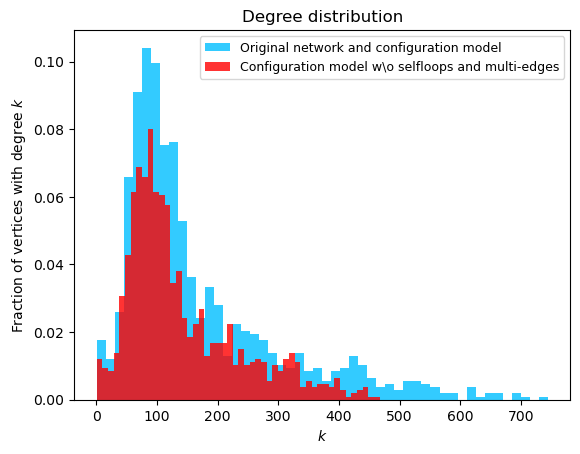

In [158]:
weights = np.ones_like(degrees) / len(degrees)
cm_weights = np.ones_like(cm1_degrees) / len(cm1_degrees)
plt.hist(degrees, weights=weights,
         bins= 50,
         label="Original network and configuration model ",
         alpha=0.8,
         color="deepskyblue");
plt.hist(cm1_degrees,
         weights= cm_weights,
         bins= 50,
         label="Сonfiguration model w\o selfloops and multi-edges",
         alpha=0.8,
         color="red");
plt.legend(prop={"size": 9});
plt.xlabel("$k$")
plt.ylabel("Fraction of vertices with degree $k$");
plt.title("Degree distribution");

Конфигурационная модель достаточно точно описывает структуру степеней вершин исходной сети

In [162]:
def randomize_network(G, Q):
    L = G.number_of_edges()
    f = Q / L

    G_copy = G.copy()

    for _ in range(Q):
        edge = list(G_copy.edges())[np.random.randint(0, L)]
        vertices = np.random.choice(G_copy.nodes(), size=2, replace=False)
        v1, v2 = vertices[0], vertices[1]
        
        if v1 != v2 and not G_copy.has_edge(v1, v2):
            G_copy.remove_edge(*edge)
            G_copy.add_edge(v1, v2)

    return G_copy

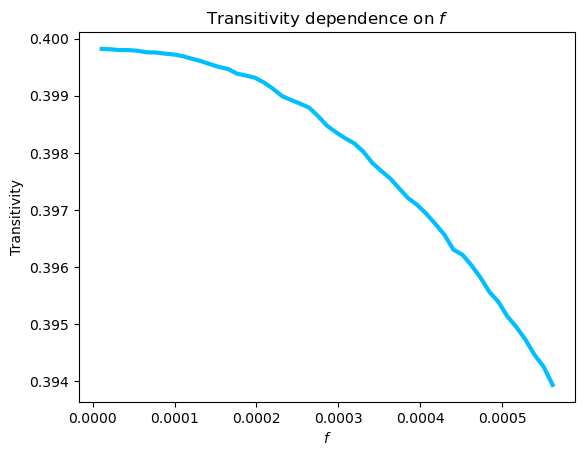

In [171]:
G_copy = G.copy()
C = [nx.transitivity(G)]

for Q in range(1, 51):
    G_copy = randomize_network(G_copy, Q)
    C.append(nx.transitivity(G_copy))
    
L = G_copy.number_of_edges()
f_values = [Q / L for Q in range(1, 52)]

plt.plot(f_values, C, color="deepskyblue", linewidth=3)
plt.xlabel("$f$")
plt.ylabel("Transitivity")
plt.title("Transitivity dependence on $f$")
plt.show()